In [651]:
#!pip install tradingeconomics
#!pip install config

In [652]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')


In [653]:
import configparser

# Create a ConfigParser object
config = configparser.ConfigParser()

# Read the config file
config.read('config.ini')


['config.ini']

In [654]:
#import API data from CSO with :
#reference: https://data.cso.ie/
# data also available in Data/BAA14.20230507T230558.csv
# BAA14
import requests
import pandas as pd
import io

#surpress warnings
pd.options.mode.chained_assignment = None  # default='warn'

url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA14%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)
data = response.json().get('result')
#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
df = pd.read_csv(io.StringIO(data))

print(df.head(5))   
print(df.info())
print(df.tail(5))







            Statistic Label  Year  \
0  Construction Enterprises  2019   
1  Construction Enterprises  2019   
2  Construction Enterprises  2019   
3  Construction Enterprises  2019   
4  Construction Enterprises  2019   

                                 Nace Rev 2 Activity    UNIT    VALUE  
0             Development of building projects (411)  Number   3846.0  
1  Construction of residential and non-residentia...  Number  12227.0  
2           Construction of roads and railways (421)  Number    777.0  
3             Construction of utility projects (422)  Number    304.0  
4  Construction of other civil engineering projec...  Number    540.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      880 non-null    object 
 1   Year                 880 non-null    int64  
 2   Nace Rev 2 Activity  880 non-null   

In [655]:
#print unique values in each column
print(df['Statistic Label'].unique())

['Construction Enterprises' 'Employees - Manual' 'Employees - Other'
 'Employees - Total'
 'Persons Engaged - Proprietors and Unpaid Family Workers'
 'Persons Engaged - Labour only subcontract basis'
 'Persons Engaged - Total' 'Wages and Salaries - Manual Employees'
 'Wages and Salaries - Other Employees'
 'Wages and Salaries - Manual and Other Employees'
 'Wages and Salaries - Labour only subcontractors'
 'Wages and Salaries - Total' 'Labour Costs - Other'
 'Labour Costs - Total' 'Turnover - Principal' 'Turnover - Subcontractor'
 'Turnover - Manufacturing' 'Turnover - Factored goods' 'Turnover - Other'
 'Turnover - Total' 'Payments to other subcontractors'
 'Turnover less payments to subcontractors' 'Assets made for own use'
 'Purchases - Materials and energy' 'Purchases - Industrial services'
 'Purchases - Factored goods' 'Purchases - Other goods/services'
 'Purchases - Total' 'Stocks at end of year - Work in progress'
 'Stocks at end of year - Unsold finished work'
 'Stocks at end o

In [656]:
print(df['Nace Rev 2 Activity'].unique())

['Development of building projects (411)'
 'Construction of residential and non-residential buildings (412)'
 'Construction of roads and railways (421)'
 'Construction of utility projects (422)'
 'Construction of other civil engineering projects (429)'
 'Demolition and site preparation (431)'
 'Electrical, plumbing and other construction installation activities (432)'
 'Building completion and finishing (433)'
 'Other specialised construction activities (439)'
 'Construction (41 to 43)']


In [657]:
#drop all rows where 'Nace Rev 2 Activity' not equal to 'Building completion and finishing (433)'
df = df[df['Nace Rev 2 Activity'] == 'Building completion and finishing (433)']

In [658]:
#drop column 'Construction of residential and non-residential buildings (412)'
df = df.drop(columns=['Nace Rev 2 Activity'])


In [659]:
print(df.columns.to_list())

['Statistic Label', 'Year', 'UNIT', 'VALUE']


In [660]:
#check for null values
print(df.isnull().sum())

Statistic Label     0
Year                0
UNIT                0
VALUE              62
dtype: int64


In [661]:
#drop rowns with null values
df = df.dropna()

In [662]:
df.to_csv('Data/BAA14.csv', index=False)

In [663]:
#print list of VALUE where Year = 2019
print(df.loc[df['Year'] == 2019, 'VALUE'].to_list())


[20096.0, 18308.0, 35597.0, 495965.0, 47975.0, 543939.0, 3078074.0, 10364.0, 2787627.0, 3039214.0, 1926951.0, 1112264.0, 1107713.0]


In [664]:
#normalize data in VALUE column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['VALUE'] = scaler.fit_transform(df[['VALUE']])
print(df.head(5))

              Statistic Label  Year    UNIT     VALUE
7    Construction Enterprises  2019  Number  0.004686
17   Construction Enterprises  2020  Number  0.005014
67          Employees - Total  2019  Number  0.004104
77          Employees - Total  2020  Number  0.003709
127   Persons Engaged - Total  2019  Number  0.009732


[0.004686275377753244, 0.004104315357234921, 0.009731556293891112, 0.15957259137553476, 0.01376036006009681, 0.17518721666879314, 1.0, 0.0015186943264756656, 0.9054650212083417, 0.9873518085026052, 0.6253313396537403, 0.3601662036157033, 0.3586849396037464]
[0.005013709259543754, 0.003708855947318948, 0.009612430249422597, 0.13617864480128733, 0.010527357328660294, 0.14828621236463244, 0.8848825794759495, 0.0, 0.7792096410074808, 0.8758794496506938, 0.5642232591323457, 0.30980159980419064, 0.305799159998646]
['Construction Enterprises', 'Employees - Total', 'Persons Engaged - Total', 'Wages and Salaries - Total', 'Labour Costs - Other', 'Labour Costs - Total', 'Turnover - Total', 'Purchases - Factored goods', 'Purchases - Total', 'Production value', 'Intermediate consumption', 'Gross value added at basic prices', 'Gross value added at factor cost']


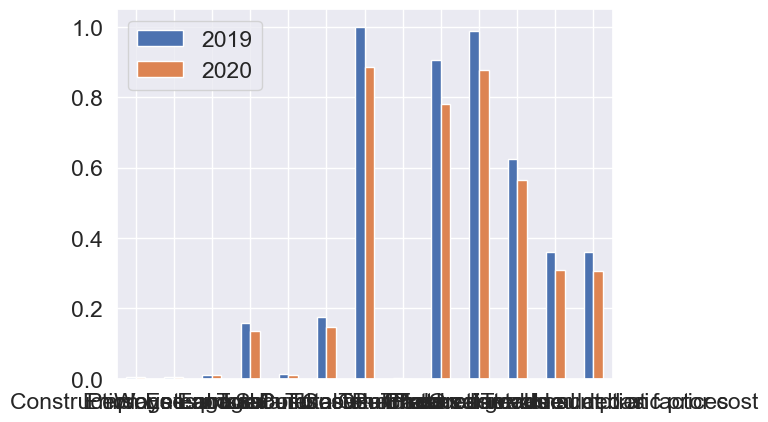

In [665]:
#plot a bar plot for each 'Statistic Label' 'VALUE' comparing 2019 and 2020
#reference: https://stackoverflow.com/questions/33458566/how-to-plot-a-bar-chart-using-matplotlib-using-a-dictionary
# list of values for each label for 2019 where UNIT = Number

nineteen = df.loc[df['Year'] == 2019, 'VALUE'].to_list()
twenty = df.loc[df['Year'] == 2020, 'VALUE'].to_list()
index_ = df.loc[df['Year'] == 2019, 'Statistic Label'].to_list()
# list of values for each label for 2020
print(nineteen)
print(twenty)
print(index_)
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame({'2019': nineteen, '2020': twenty}, index=index_)
ax = df.plot.bar(rot=0)
plt.show()

In [666]:
#BAA15 - Persons Engaged 


url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA15%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)

data = response.json().get('result')

#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
personsEngaged_df = pd.read_csv(io.StringIO(data))
print(personsEngaged_df.head(5))
print(personsEngaged_df.info()) 

print(personsEngaged_df.tail(5))


            Statistic Label  Year Persons Engaged    UNIT    VALUE
0  Construction Enterprises  2019           0 - 9  Number  56935.0
1  Construction Enterprises  2019         10 - 49  Number   2007.0
2  Construction Enterprises  2019        50 - 249  Number    208.0
3  Construction Enterprises  2019    250 and over  Number     25.0
4  Construction Enterprises  2020           0 - 9  Number  60553.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  352 non-null    object 
 1   Year             352 non-null    int64  
 2   Persons Engaged  352 non-null    object 
 3   UNIT             352 non-null    object 
 4   VALUE            104 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.9+ KB
None
                      Statistic Label  Year Persons Engaged           UNIT  \
347  Gross value added at 

2

    2.1

In [667]:
# reference https://ec.europa.eu/eurostat/databrowser/view/EI_ISBU_Q__custom_6200052/settings_1/table?lang=en
df = pd.read_csv('Data/ei_isbu_q__custom_6200052_linear.csv', header=0,  parse_dates=True)

In [668]:
df.head(5)

DATAFLOW        LAST UPDATE freq   unit s_adj   indic nace_r2  \
0  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
1  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
2  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
3  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
4  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   

  geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0  AL     2010-Q1       90.4      NaN  
1  AL     2010-Q2       88.9      NaN  
2  AL     2010-Q3       87.0      NaN  
3  AL     2010-Q4       79.2      NaN  
4  AL     2011-Q1       81.2      NaN

    2.2

In [669]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     7252 non-null   object 
 1   LAST UPDATE  7252 non-null   object 
 2   freq         7252 non-null   object 
 3   unit         7252 non-null   object 
 4   s_adj        7252 non-null   object 
 5   indic        7252 non-null   object 
 6   nace_r2      7252 non-null   object 
 7   geo          7252 non-null   object 
 8   TIME_PERIOD  7252 non-null   object 
 9   OBS_VALUE    7248 non-null   float64
 10  OBS_FLAG     634 non-null    object 
dtypes: float64(1), object(10)
memory usage: 623.3+ KB


In [670]:
#show rows where 'OBS_VALUE' is null
print(df[df['OBS_VALUE'].isnull()])

                  DATAFLOW        LAST UPDATE freq   unit s_adj   indic  \
156   ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI   
1356  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI   
3120  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-HWI   
6737  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-WSI   

     nace_r2 geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
156        F  BE     2022-Q4        NaN        c  
1356       F  NL     2022-Q4        NaN        c  
3120       F  NL     2022-Q4        NaN        c  
6737       F  NL     2022-Q4        NaN        c  


In [671]:
#remove rows where 'OBS_VALUE' is null
df = df[df['OBS_VALUE'].notna()]

In [672]:
#drop rows where TIME_PERIOD contains '2023'
df = df[~df['TIME_PERIOD'].str.contains('2023')]

    2.3

In [673]:
#loop through columns and print unique values
for col in df.columns:
    print(col, ": ", df[col].unique())
    


DATAFLOW :  ['ESTAT:EI_ISBU_Q(1.0)']
LAST UPDATE :  ['13/05/23 11:00:00']
freq :  ['Q']
unit :  ['I2015']
s_adj :  ['NSA']
indic :  ['IS-EPI' 'IS-HWI' 'IS-IP' 'IS-WSI']
nace_r2 :  ['F']
geo :  ['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK' 'BA']
TIME_PERIOD :  ['2010-Q1' '2010-Q2' '2010-Q3' '2010-Q4' '2011-Q1' '2011-Q2' '2011-Q3'
 '2011-Q4' '2012-Q1' '2012-Q2' '2012-Q3' '2012-Q4' '2013-Q1' '2013-Q2'
 '2013-Q3' '2013-Q4' '2014-Q1' '2014-Q2' '2014-Q3' '2014-Q4' '2015-Q1'
 '2015-Q2' '2015-Q3' '2015-Q4' '2016-Q1' '2016-Q2' '2016-Q3' '2016-Q4'
 '2017-Q1' '2017-Q2' '2017-Q3' '2017-Q4' '2018-Q1' '2018-Q2' '2018-Q3'
 '2018-Q4' '2019-Q1' '2019-Q2' '2019-Q3' '2019-Q4' '2020-Q1' '2020-Q2'
 '2020-Q3' '2020-Q4' '2021-Q1' '2021-Q2' '2021-Q3' '2021-Q4' '2022-Q1'
 '2022-Q2' '2022-Q3' '2022-Q4']
OBS_VALUE :  [ 90.4  88.9  87.  ... 343.7 464.7 513.9]
OBS_FLAG :  [nan 'p

In [674]:
#drop rows where geo = 'UK'
df = df[df['geo'].str.contains('UK') == False]

In [675]:
#count the number of entries for each unique value on 'OBS_FLAG'
print(df['OBS_FLAG'].value_counts())

p    295
e    278
Name: OBS_FLAG, dtype: int64


2.4

In [676]:
#drop column 'LAST UPDATE'
df = df.drop(columns=['LAST UPDATE'])
#drop column 'FREQ'
df = df.drop(columns=['freq'])
#drop column 'DATAFLOW'
df = df.drop(columns=['DATAFLOW'])
#drop column 's_adj'
df = df.drop(columns=['s_adj'])
#drop column 'unit'
df = df.drop(columns=['unit'])
#drop column 'nace_r2'
df = df.drop(columns=['nace_r2'])
#drop column 'OBS_FLAG'
df = df.drop(columns=['OBS_FLAG'])

df.head(5)



indic geo TIME_PERIOD  OBS_VALUE
0  IS-EPI  AL     2010-Q1       90.4
1  IS-EPI  AL     2010-Q2       88.9
2  IS-EPI  AL     2010-Q3       87.0
3  IS-EPI  AL     2010-Q4       79.2
4  IS-EPI  AL     2011-Q1       81.2

In [677]:
#drop everything after and including '-Q' in 'TIME_PERIOD'
df['TIME_PERIOD'] = df['TIME_PERIOD'].str.split('-Q').str[0]
df.head(20)

indic geo TIME_PERIOD  OBS_VALUE
0   IS-EPI  AL        2010       90.4
1   IS-EPI  AL        2010       88.9
2   IS-EPI  AL        2010       87.0
3   IS-EPI  AL        2010       79.2
4   IS-EPI  AL        2011       81.2
5   IS-EPI  AL        2011       79.6
6   IS-EPI  AL        2011       77.9
7   IS-EPI  AL        2011       76.3
8   IS-EPI  AL        2012       87.3
9   IS-EPI  AL        2012       85.3
10  IS-EPI  AL        2012       79.0
11  IS-EPI  AL        2012       73.6
12  IS-EPI  AL        2013       80.2
13  IS-EPI  AL        2013       75.7
14  IS-EPI  AL        2013       74.8
15  IS-EPI  AL        2013       75.5
16  IS-EPI  AL        2014       87.6
17  IS-EPI  AL        2014       87.7
18  IS-EPI  AL        2014       89.9
19  IS-EPI  AL        2014       93.8

#sum the values for each 'TIME_PERIOD', 'indic' and 'geo'
df = df.groupby(['TIME_PERIOD', 'indic', 'geo']).sum().reset_index()
df.head(20)

2.4.1

In [678]:
#create a column for each unique value in 'indic'setting its row value =  to 'OBS_VALUE'
df = pd.get_dummies(df, columns=['indic'])
#remove 'indic_' in column names
df.columns = df.columns.str.replace('indic_', '')
#if the value in 'IS-EPI' or 'IS-HWI' or 'IS-IP' or 'IS-WSI' = 1, set its value to 'OBS_VALUE'
df['IS-EPI'] = df['IS-EPI'] * df['OBS_VALUE']
df['IS-HWI'] = df['IS-HWI'] * df['OBS_VALUE']
df['IS-IP'] = df['IS-IP'] * df['OBS_VALUE']
df['IS-WSI'] = df['IS-WSI'] * df['OBS_VALUE']



df.head(5)

geo TIME_PERIOD  OBS_VALUE  IS-EPI  IS-HWI  IS-IP  IS-WSI
0  AL        2010       90.4    90.4     0.0    0.0     0.0
1  AL        2010       88.9    88.9     0.0    0.0     0.0
2  AL        2010       87.0    87.0     0.0    0.0     0.0
3  AL        2010       79.2    79.2     0.0    0.0     0.0
4  AL        2011       81.2    81.2     0.0    0.0     0.0

In [679]:
#drop the OBS_VALUE column

df = df.drop(columns=['OBS_VALUE'])
df.head(5)


geo TIME_PERIOD  IS-EPI  IS-HWI  IS-IP  IS-WSI
0  AL        2010    90.4     0.0    0.0     0.0
1  AL        2010    88.9     0.0    0.0     0.0
2  AL        2010    87.0     0.0    0.0     0.0
3  AL        2010    79.2     0.0    0.0     0.0
4  AL        2011    81.2     0.0    0.0     0.0

In [680]:
#make individual datasets for each 'indic' column


df_IS_EPI = df[df['IS-EPI'] != 0]

df_IS_HWI = df[df['IS-HWI'] != 0]
df_IS_IP = df[df['IS-IP'] != 0]
df_IS_WSI = df[df['IS-WSI'] != 0]


In [681]:
# join all dataframes together on 'TIME_PERIOD' and 'geo', drop row if missing values
df = pd.merge(df_IS_EPI, df_IS_HWI, on=['geo', 'TIME_PERIOD'], how='inner')
df.dropna(inplace=True)
# if value in 'IS-HWI_y' not = 0 set 'IS-HWI_x' = 'IS-HWI_y'
df.loc[df['IS-HWI_y'] != 0, 'IS-HWI_x'] = df['IS-HWI_y']
df = df.iloc[:, :4]
# join all dataframes together on 'TIME_PERIOD' and 'geo', drop row if missing values
df = pd.merge(df, df_IS_IP, on=['geo', 'TIME_PERIOD'], how='inner')
df.dropna(inplace=True)
# if value in 'IS-HWI_y' not = 0 set 'IS-HWI_x' = 'IS-HWI_y'
df.drop(['IS-EPI', 'IS-HWI', 'IS-WSI'], axis=1, inplace=True)
# join all dataframes together on 'TIME_PERIOD' and 'geo', drop row if missing values
df = pd.merge(df, df_IS_WSI, on=['geo', 'TIME_PERIOD'], how='inner')
df.dropna(inplace=True)
df.drop(['IS-EPI', 'IS-HWI', 'IS-IP_y'], axis=1, inplace=True)
# if colimn name has _x, remove _x
df.columns = df.columns.str.replace('_x', '')

df.head()


geo TIME_PERIOD  IS-EPI  IS-HWI  IS-IP  IS-WSI
0  AT        2010    87.3    81.8   68.0    69.0
1  AT        2010    87.3    81.8   68.0    90.8
2  AT        2010    87.3    81.8   68.0    89.9
3  AT        2010    87.3    81.8   68.0   103.9
4  AT        2010    87.3    81.8   97.8    69.0

In [682]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 104748 entries, 0 to 104747
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   geo          104748 non-null  object 
 1   TIME_PERIOD  104748 non-null  object 
 2   IS-EPI       104748 non-null  float64
 3   IS-HWI       104748 non-null  float64
 4   IS-IP        104748 non-null  float64
 5   IS-WSI       104748 non-null  float64
dtypes: float64(4), object(2)
memory usage: 5.6+ MB


2.4.2

In [683]:
# check for values = 0 in any column
df.isin([0]).any()


geo            False
TIME_PERIOD    False
IS-EPI         False
IS-HWI         False
IS-IP          False
IS-WSI         False
dtype: bool

In [684]:
#the last value for each country in each indicator
df_lastValueEntry = df.groupby('geo').tail(1)
df_lastValueEntry
#df_lastValueEntry.to_excel('df_lastValueEntry.xlsx')


geo TIME_PERIOD  IS-EPI  IS-HWI  IS-IP  IS-WSI
3327    AT        2022   121.7   118.6  152.2   170.4
6591    BE        2022   116.3   109.8   97.5   138.8
9919    BG        2022    88.9    83.0   88.6   162.5
13247   CY        2022   168.7   195.9  209.8   216.9
16575   CZ        2022    97.2    85.7  123.8   158.3
19903   DE        2022   110.7   105.0  120.2   144.4
23231   DK        2022   127.7   129.9  138.3   180.6
26559   EE        2022   124.0   120.1  154.0   191.8
29887   EL        2022    77.8   118.6  123.8   125.6
33215   ES        2022   121.2   106.3   86.5   129.5
36543   FI        2022   103.5   106.2  132.6   138.6
39871   FR        2022   114.4   114.9  105.4   140.3
43199   HR        2022   131.5   148.5  139.2   141.4
46527   HU        2022   150.6   139.6  198.0   346.7
49855   IE        2022   168.5   174.6  135.7   222.5
53183   IT        2022   117.8   135.1  137.5   161.6
56511   LT        2022   100.1    97.7  150.3   177.5
59839   LU        2022   106.8   107.5  109.4   141.8
63167   LV        2022    95.6   104.8  123.6   167.6
66495   ME        2022   174.2   163.7  247.0   126.3
69823   MK        2022    78.6    79.3   75.0   176.1
73151   MT        2022    96.9    97.7  173.5   142.1
76331   NL        2022   117.6   104.9  130.1   129.5
79659   NO        2022   122.6   125.3  134.9   160.1
82987   PL        2022   111.7   118.5  159.1   186.9
86315   PT        2022   106.2   102.0  103.5   129.7
89643   RO        2022   130.8   123.9  193.9   354.8
92971   RS        2022   140.2   107.8  234.2   170.2
96299   SE        2022   125.0   132.7  146.8   157.4
99627   SI        2022   140.1    90.4  187.8   141.7
102955  SK        2022   107.2    99.4  102.2   138.9
104747  TR        2016   105.9   105.9   97.4   134.8

2.5

In [685]:
#drop rows for geo = 'TR'
df = df[df['geo'].str.contains('TR') == False]
df_IS_EPI = df_IS_EPI[df_IS_EPI['geo'].str.contains('TR') == False]     
df_IS_HWI = df_IS_HWI[df_IS_HWI['geo'].str.contains('TR') == False]
df_IS_IP = df_IS_IP[df_IS_IP['geo'].str.contains('TR') == False]
df_IS_WSI = df_IS_WSI[df_IS_WSI['geo'].str.contains('TR') == False]

In [686]:
#reset df_ index to 'TIME_PERIOD'
df = df.set_index('TIME_PERIOD')
df.head()

geo  IS-EPI  IS-HWI  IS-IP  IS-WSI
TIME_PERIOD                                   
2010         AT    87.3    81.8   68.0    69.0
2010         AT    87.3    81.8   68.0    90.8
2010         AT    87.3    81.8   68.0    89.9
2010         AT    87.3    81.8   68.0   103.9
2010         AT    87.3    81.8   97.8    69.0

In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102956 entries, 2010 to 2022
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   geo     102956 non-null  object 
 1   IS-EPI  102956 non-null  float64
 2   IS-HWI  102956 non-null  float64
 3   IS-IP   102956 non-null  float64
 4   IS-WSI  102956 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.7+ MB


5.0

In [688]:
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image

def cht(df, var, title):
    colors = {"IE": "red"}
    #grey color scheme for all other countries
    
    color_discrete_map = {
        c: colors.get(c,'grey')
        for c in df['geo'].unique()}

    
    fig = px.bar(df.sort_values('TIME_PERIOD'), y="geo", x=var, color='geo', orientation='h', text='geo', range_x=[0, df[var].max()], height=1000,color_discrete_map=color_discrete_map,
                 animation_frame="TIME_PERIOD", animation_group="geo")
    fig.update_layout(title_text=title)
    # Set text color
    fig.update_traces(textfont_color='white', showlegend=False)

    
    # Set animation speed
    # Set duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
    # Set transition duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

    fig.show()
    


In [689]:
vars = ['IS-EPI', 'IS-HWI', 'IS-IP', 'IS-WSI']
dfs = [df_IS_EPI, df_IS_HWI, df_IS_IP, df_IS_WSI]
for i in range(len(vars)):
    cht(dfs[i], vars[i], vars[i])


5.1

In [690]:
import pycountry

# Define a function to get the country name from an ISO-3166-1 alpha-2 code
def get_country_name(iso_2):
    try:
        return pycountry.countries.get(alpha_2=iso_2).name
    except:
        return None

# Add a new column to the dataframe with the country names
df['country_name'] = df['geo'].apply(get_country_name)
df_IS_EPI['country_name'] = df_IS_EPI['geo'].apply(get_country_name)
df_IS_HWI['country_name'] = df_IS_HWI['geo'].apply(get_country_name)
df_IS_IP['country_name'] = df_IS_IP['geo'].apply(get_country_name)
df_IS_WSI['country_name'] = df_IS_WSI['geo'].apply(get_country_name)


df.head(5)


geo  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name
TIME_PERIOD                                                
2010         AT    87.3    81.8   68.0    69.0      Austria
2010         AT    87.3    81.8   68.0    90.8      Austria
2010         AT    87.3    81.8   68.0    89.9      Austria
2010         AT    87.3    81.8   68.0   103.9      Austria
2010         AT    87.3    81.8   97.8    69.0      Austria

In [691]:
#show rows with missing country names
df[df['country_name'].isnull()]

geo  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name
TIME_PERIOD                                                
2010         EL   144.8   137.9  221.3   177.0         None
2010         EL   144.8   137.9  221.3   184.8         None
2010         EL   144.8   137.9  221.3   177.9         None
2010         EL   144.8   137.9  221.3   181.9         None
2010         EL   144.8   137.9  249.1   177.0         None
...          ..     ...     ...    ...     ...          ...
2022         EL    77.8   118.6   82.1   125.6         None
2022         EL    77.8   118.6  123.8    84.9         None
2022         EL    77.8   118.6  123.8   111.2         None
2022         EL    77.8   118.6  123.8   108.0         None
2022         EL    77.8   118.6  123.8   125.6         None

[3328 rows x 6 columns]

In [692]:
#'check if 'Greece' is in country_name column'
'Greece' in df['country_name'].unique()

False

In [693]:
#where 'geo' = 'EL' set 'country_name' = 'Greece'
df.loc[df['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_EPI.loc[df_IS_EPI['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_HWI.loc[df_IS_HWI['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_IP.loc[df_IS_IP['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_WSI.loc[df_IS_WSI['geo'] == 'EL', 'country_name'] = 'Greece'


In [694]:
#drop columns from df_IS_EPI equal to IS-HWI, IS-IP, IS-WSI
df_IS_EPI.drop(['IS-HWI', 'IS-IP', 'IS-WSI'], axis=1, inplace=True)
#drop columns from df_IS_HWI equal to IS-EPI, IS-IP, IS-WSI
df_IS_HWI.drop(['IS-EPI', 'IS-IP', 'IS-WSI'], axis=1, inplace=True)
#drop columns from df_IS_IP equal to IS-EPI, IS-HWI, IS-WSI
df_IS_IP.drop(['IS-EPI', 'IS-HWI', 'IS-WSI'], axis=1, inplace=True)
#drop columns from df_IS_WSI equal to IS-EPI, IS-HWI, IS-IP
df_IS_WSI.drop(['IS-EPI', 'IS-HWI', 'IS-IP'], axis=1, inplace=True)


6.0

In [695]:
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image

def cht2(df, var, title):
    colors = {"Ireland": "red"}
    #grey color scheme for all other countries
    
    color_discrete_map = {
        c: colors.get(c,'grey')
        for c in df['country_name'].unique()}

    
    fig = px.bar(df.sort_values('TIME_PERIOD'), y="country_name", x=var, color='country_name', orientation='h', text='country_name', range_x=[0, df[var].max()+10], height=1000,color_discrete_map=color_discrete_map,
                 animation_frame="TIME_PERIOD", animation_group="country_name")
    fig.update_layout(title_text=title)
    # Set text color
    fig.update_traces(textfont_color='white', showlegend=False)

    
    # Set animation speed
    # Set duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
    # Set transition duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

    fig.show()
    


6.1

In [696]:
vars = ['IS-EPI', 'IS-HWI', 'IS-IP', 'IS-WSI']
dfs = [df_IS_EPI, df_IS_HWI, df_IS_IP, df_IS_WSI]
for i in range(len(vars)):
    cht2(dfs[i], vars[i], vars[i])


7.0 Statistics


7.1

In [697]:
# create a new dataframe with the last value for each country in each indicator
df_describe = df.describe()
#df_describe.to_excel('df_describe.xlsx')

In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102956 entries, 2010 to 2022
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   geo           102956 non-null  object 
 1   IS-EPI        102956 non-null  float64
 2   IS-HWI        102956 non-null  float64
 3   IS-IP         102956 non-null  float64
 4   IS-WSI        102956 non-null  float64
 5   country_name  102956 non-null  object 
dtypes: float64(4), object(2)
memory usage: 5.5+ MB


7.2

In [699]:
#visulize the distribution of each indicator
import seaborn as sns
import matplotlib.pyplot as plt
#increase the size of the font
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(ax=axes[0, 0], data=df_IS_EPI, x="IS-EPI", kde=True, color="red")
sns.histplot(ax=axes[0, 1], data=df_IS_HWI, x="IS-HWI", kde=True, color="red")
sns.histplot(ax=axes[1, 0], data=df_IS_IP, x="IS-IP", kde=True, color="red")
sns.histplot(ax=axes[1, 1], data=df_IS_WSI, x="IS-WSI", kde=True, color="red")


<AxesSubplot:xlabel='IS-WSI', ylabel='Count'>

<AxesSubplot:xlabel='IS-WSI'>

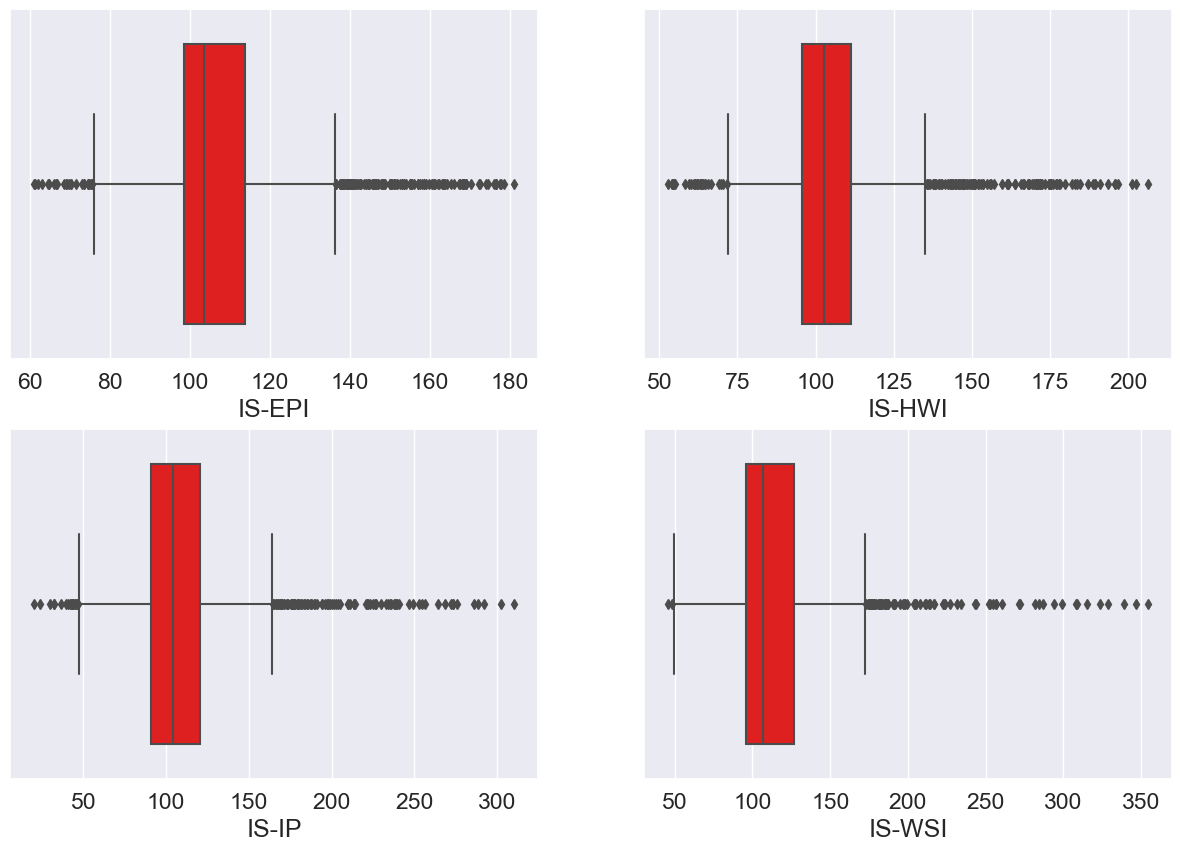

In [700]:
#visulize any outliers in each indicator
import seaborn as sns
import matplotlib.pyplot as plt
#increase the size of the font
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], data=df_IS_EPI, x="IS-EPI", color="red")
sns.boxplot(ax=axes[0, 1], data=df_IS_HWI, x="IS-HWI", color="red")
sns.boxplot(ax=axes[1, 0], data=df_IS_IP, x="IS-IP", color="red")
sns.boxplot(ax=axes[1, 1], data=df_IS_WSI, x="IS-WSI", color="red")


In [701]:
# Create a function for checking normality of a feature
#reference: https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/
#function to return plots for the feature
import scipy.stats as stats
import pylab
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature]).set_title('Distribution of '+feature)
    plt.subplot(1,2,2)
    #reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
    stats.probplot(data[feature],plot=pylab)
    plt.show()

In [702]:
#calculate the z score for each indicator
from scipy import stats
# Calculate z-scores for each data point
def outliers(data):
    z_scores = np.abs(stats.zscore(data))

    # Define a threshold for identifying outliers
    threshold = 3  # Adjust this threshold as needed

    # Identify outliers
    outliers = np.where(z_scores > threshold)[0]

    # Count the number of outliers
    num_outliers = len(outliers)


    return num_outliers
    

print("Number of outliers:",outliers(df['IS-EPI']),'IS-EPI',' Number of values: ',df['IS-EPI'].count())
print("Number of outliers:",outliers(df['IS-HWI']),'IS-HWI',' Number of values: ',df['IS-HWI'].count())
print("Number of outliers:",outliers(df['IS-IP']),'IS-IP',' Number of values: ',df['IS-IP'].count())
print("Number of outliers:",outliers(df['IS-WSI']),'IS-WSI',' Number of values: ',df['IS-WSI'].count())

#percentage of outliers in each indicator
print('IS-EPI',outliers(df['IS-EPI'])/df['IS-EPI'].count()*100,'%')
print('IS-HWI',outliers(df['IS-HWI'])/df['IS-HWI'].count()*100,'%')
print('IS-IP',outliers(df['IS-IP'])/df['IS-IP'].count()*100,'%')
print('IS-WSI',outliers(df['IS-WSI'])/df['IS-WSI'].count()*100,'%')

Number of outliers: 2496 IS-EPI  Number of values:  102956
Number of outliers: 3008 IS-HWI  Number of values:  102956
Number of outliers: 2048 IS-IP  Number of values:  102956
Number of outliers: 1984 IS-WSI  Number of values:  102956
IS-EPI 2.424336609813901 %
IS-HWI 2.9216364272116246 %
IS-IP 1.989199269590893 %
IS-WSI 1.9270367924161778 %


7.3


In [703]:
#anderson-darling test for normality
#Checking if the indicators accross the countries are normally distributed
from scipy.stats import anderson
normallyDistributedIndicators = []
NOTnormallyDistributedIndicators = []
def aDarling(df, var):
    result = anderson(df[var])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
            #append the indicator to the list of normally distributed indicators if not already there
            if var not in normallyDistributedIndicators:
                normallyDistributedIndicators.append(var)
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            if var not in NOTnormallyDistributedIndicators:
                NOTnormallyDistributedIndicators.append(var)

        
for i in range(len(vars)):
    aDarling(dfs[i], vars[i])

print('Mormally distributed: ', normallyDistributedIndicators)
print('Not Normally Distributed: ', NOTnormallyDistributedIndicators)

Statistic: 55.127
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)
Statistic: 64.982
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)
Statistic: 46.348
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)
Statistic: 64.669
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look nor

In [704]:
#perform a shapiro-wilk test for normality on each indicator
from scipy.stats import shapiro
def sWilk(df, var):
    stat, p = shapiro(df[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(var,' Sample looks Gaussian (fail to reject H0)')
    else:
        print(var,' Sample does not look Gaussian (reject H0)')
        
for i in range(len(vars)):
    sWilk(dfs[i], vars[i])
  

Statistics=0.900, p=0.000
IS-EPI  Sample does not look Gaussian (reject H0)
Statistics=0.863, p=0.000
IS-HWI  Sample does not look Gaussian (reject H0)
Statistics=0.884, p=0.000
IS-IP  Sample does not look Gaussian (reject H0)
Statistics=0.805, p=0.000
IS-WSI  Sample does not look Gaussian (reject H0)


In [705]:
#perform a chi-square test for normality on each indicator
from scipy.stats import normaltest
def chiSquare(df, var):
    stat, p = normaltest(df[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(var,' Sample looks Gaussian (fail to reject H0)')
    else:
        print(var,' Sample does not look Gaussian (reject H0)')
        
for i in range(len(vars)):
    chiSquare(dfs[i], vars[i])
    
    

Statistics=430.797, p=0.000
IS-EPI  Sample does not look Gaussian (reject H0)
Statistics=565.771, p=0.000
IS-HWI  Sample does not look Gaussian (reject H0)
Statistics=646.478, p=0.000
IS-IP  Sample does not look Gaussian (reject H0)
Statistics=967.975, p=0.000
IS-WSI  Sample does not look Gaussian (reject H0)


7.3.1

In [706]:
#checking which county's Production Index indicator are normally distributed
from scipy import stats
# Perform Shapiro-Wilk test
normallyDistributed_IP = []
def wilk(df):
    for country in df['geo'].unique():
        
        statistic, p_value = stats.shapiro(df[df['geo']==country]['IS-IP'])

        # Print the test result
        alpha = 0.05  # Set the significance level
        if p_value > alpha:
            #print("Data is normally distributed (fail to reject H0)")
            if country not in normallyDistributed_IP:
                normallyDistributed_IP.append(country)
        else:
        # print("Data is not normally distributed (reject H0)")
            pass

wilk(df_IS_IP)
print(normallyDistributed_IP)
#create a new dataframe with the last value for each country in each indicator
df_normallyDistributed_IP = df_IS_IP[df_IS_IP['geo'].isin(normallyDistributed_IP)]

#drop columns IS-HWI, IS-WSI and IS-EPI
df_normallyDistributed_IP = df_normallyDistributed_IP.drop(['IS-HWI', 'IS-WSI', 'IS-EPI'], axis=1)
df_normallyDistributed_IP.head()
df_normallyDistributed_IP['country_name'].unique().tolist()





['AT', 'BA', 'CY', 'DK', 'EE', 'ES', 'FI', 'HU', 'LT', 'LU', 'LV', 'MK', 'NL', 'NO', 'PL', 'RO', 'SI']


KeyError: "['IS-HWI', 'IS-WSI', 'IS-EPI'] not found in axis"

7.4

In [ ]:
#anderson-darling test for normality
#Checking if the Production index indicator fror all countries are normally distributed 
from scipy.stats import anderson
normallyDistributedIndicators = []
NOTnormallyDistributedIndicators = []
def aDarling(df, var):
    result = anderson(df[var])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
            #append the indicator to the list of normally distributed indicators if not already there
            if var not in normallyDistributedIndicators:
                normallyDistributedIndicators.append(var)
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            if var not in NOTnormallyDistributedIndicators:
                NOTnormallyDistributedIndicators.append(var)

        
aDarling(df_normallyDistributed_IP, 'IS-IP')

print('Mormally distributed: ', normallyDistributedIndicators)
print('Not Normally Distributed: ', NOTnormallyDistributedIndicators)

Statistic: 8.821
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.087, data does not look normal (reject H0)
Mormally distributed:  []
Not Normally Distributed:  ['IS-IP']


7.5

In [ ]:
#calculate the confidence interval for each indicator
from scipy import stats
import numpy as np
# Calculate the confidence interval for each data point
def confidence_interval(data):
    confidence = 0.95
    n = len(data)
    m = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    return start, end



print('IS-IP',confidence_interval(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP']))





IS-IP (102.05028201630178, 110.10356413754444)


In [ ]:
#confirm calculation based on class lecture demo
import scipy.stats as st
st.t.interval(alpha=0.95, df=len(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP'])-1, loc=np.mean(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP']), scale=st.sem(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP']))

(102.05028201630178, 110.10356413754444)

7.5.1

In [ ]:
df_IS_IP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 3635 to 5415
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo           1768 non-null   object 
 1   TIME_PERIOD   1768 non-null   object 
 2   IS-IP         1768 non-null   float64
 3   country_name  1768 non-null   object 
dtypes: float64(1), object(3)
memory usage: 69.1+ KB


In [853]:
#Calculate the proportion of Construction Index values for each country relative to the total Construction Index values across all European countries for each year
#https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
df_IS_IP['Proportion'] = df_IS_IP.groupby('TIME_PERIOD')['IS-IP'].apply(lambda x:  x / float(x.sum()))
df_IS_WSI['Proportion'] = df_IS_WSI.groupby('TIME_PERIOD')['IS-WSI'].apply(lambda x:  x / float(x.sum()))
df_IS_HWI['Proportion'] = df_IS_HWI.groupby('TIME_PERIOD')['IS-HWI'].apply(lambda x:  x / float(x.sum()))
df_IS_EPI['Proportion'] = df_IS_EPI.groupby('TIME_PERIOD')['IS-EPI'].apply(lambda x:  x / float(x.sum()))

In [854]:
#IS-IP for AL for 2010
df_IS_IP[(df_IS_IP['geo']=='AL') & (df_IS_IP['TIME_PERIOD']=='2010')]['Proportion']

3635    0.005602
3636    0.007996
3637    0.007070
3638    0.008044
Name: Proportion, dtype: float64

In [855]:
df_IS_IP[(df_IS_IP['geo']=='AL') & (df_IS_IP['TIME_PERIOD']=='2010')]['IS-IP'].sum()

418.7

In [856]:
#total IS-IP for 2010
df_IS_IP[df_IS_IP['TIME_PERIOD']=='2010']['IS-IP'].sum()

14583.1

<AxesSubplot:title={'center':'Ireland'}, xlabel='TIME_PERIOD', ylabel='Proportion'>

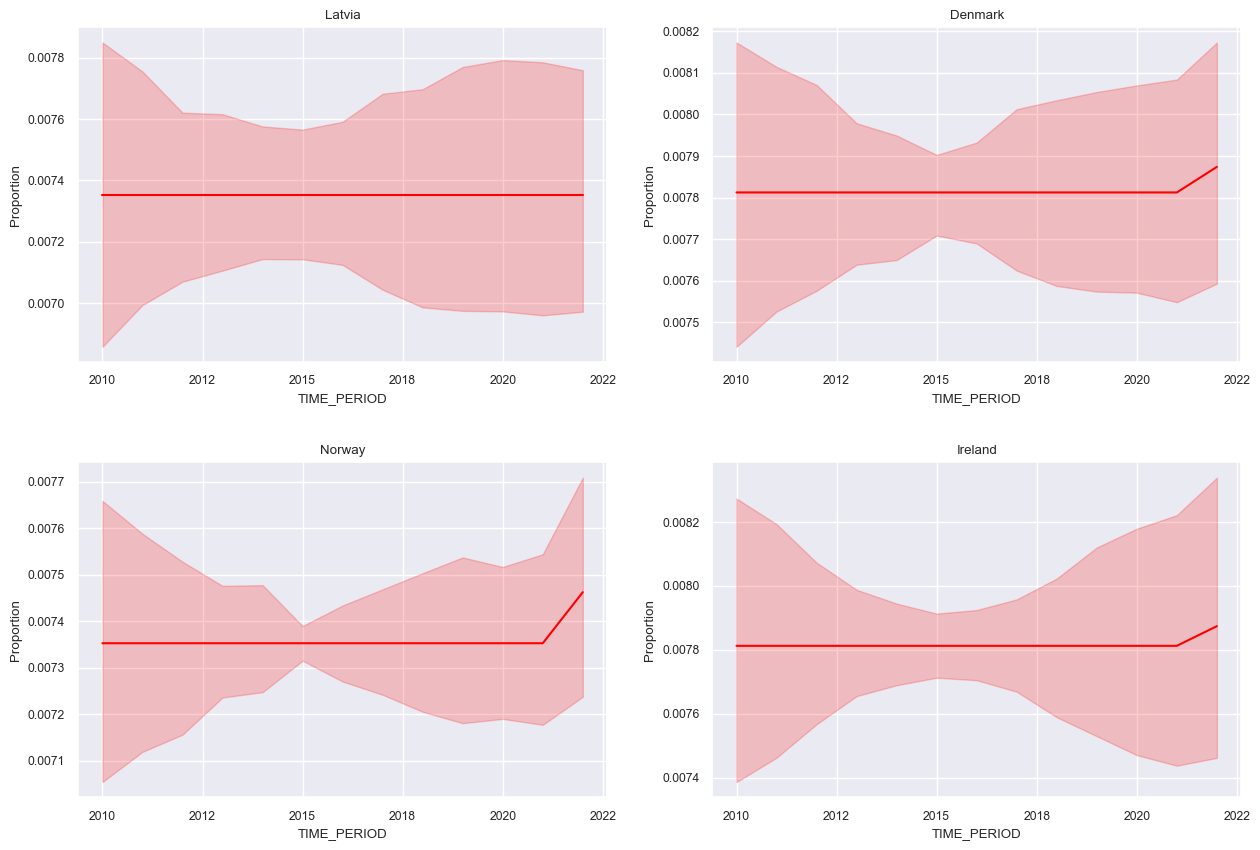

In [857]:
#visu;ize the confidence interval for each indicator

#visulize the confidence interval for each indicator
import seaborn as sns
import matplotlib.pyplot as plt

#decresae the size of the font
sns.set(font_scale=.8)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
#turn sns.lineplot x axis ticks 90 degrees

#set title for each plot
axes[0, 0].set_title('Latvia')
axes[0, 1].set_title('Denmark')
axes[1, 0].set_title('Norway')
axes[1, 1].set_title('Ireland')

#increase space between row 0 and row 1
fig.subplots_adjust(hspace=.3)
#display every 4th tick
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[0, 1].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[1, 0].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[1, 1].xaxis.set_major_locator(plt.MaxNLocator(6))

sns.lineplot(ax=axes[0, 0], data=df_IS_IP, x="TIME_PERIOD", y='Proportion', color="red")
sns.lineplot(ax=axes[1, 0], data=df_IS_EPI, x="TIME_PERIOD", y='Proportion', color="red")
sns.lineplot(ax=axes[0, 1], data=df_IS_HWI, x="TIME_PERIOD", y='Proportion', color="red")
sns.lineplot(ax=axes[1, 1], data=df_IS_WSI, x="TIME_PERIOD", y='Proportion', color="red")






#bootstrap resampling to calculate the confidence interval for each indicator
#https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
from sklearn.utils import resample
# configure bootstrap
def bootS(df, var): 
    n_iterations = 1000
    n_size = int(len(df[var]))
    # run bootstrap
    stats = list()
    for i in range(n_iterations):
        # prepare train and test sets
        s = resample(df[var], n_samples=n_size)
        # calculate statistic
        stat = np.mean(s)
        # store
        stats.append(stat)
    # plot scores
    plt.hist(stats)
    plt.show()
    
for i in range(len(vars)):
    bootS(dfs[i], vars[i])

7.5.2

In [858]:
#display sum of Proportion by year for all countries
df_IS_IP.groupby('TIME_PERIOD')['Proportion'].sum()

TIME_PERIOD
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: Proportion, dtype: float64

7.5.3

In [860]:
import numpy as np
from scipy.stats import t

# Assuming you have a DataFrame named 'df_IS_IP' containing the necessary data
# and the columns 'geo', 'Proportion', and 'Year'

# Step 1: Filter the data for Ireland ('IE')
df_IE = df_IS_IP[df_IS_IP['geo'] == 'IE']

# Step 2: Calculate the average proportion across all countries for each year
average_proportions = df_IS_IP.groupby('TIME_PERIOD')['Proportion'].mean()

# Step 3: Calculate the sample size for Ireland for each year
sample_sizes = df_IE.groupby('TIME_PERIOD').size().values


# Step 4: Calculate the mean and standard deviation of the proportions for Ireland for each year
means = df_IE.groupby('TIME_PERIOD')['Proportion'].mean().values
stds = df_IE.groupby('TIME_PERIOD')['Proportion'].std(ddof=1).values

# Step 5: Calculate the t-value for the desired confidence level
confidence_level = 0.95
t_value = t.ppf((1 + confidence_level) / 2, df=sample_sizes - 1)

# Step 6: Calculate the margin of error
margin_of_error = t_value * stds / np.sqrt(sample_sizes)

# Step 7: Calculate the confidence intervals
lower_bounds = means - margin_of_error
upper_bounds = means + margin_of_error

# Step 8: Check if the lower bound is above the average proportion
#This will provide you with the confidence intervals where the lower bound is above the average proportion, indicating that Ireland has an above-average level of proportion with the specified confidence level.
above_average = lower_bounds > average_proportions


# Print the confidence intervals for each year
for year, lower, upper, is_above_average, average, proportion in zip(df_IE['TIME_PERIOD'].unique(), lower_bounds, upper_bounds, above_average, average_proportions, means):
    #format values to 4 decimal places
    lower = "{:.4f}".format(lower)
    upper = "{:.4f}".format(upper)
    average = "{:.4f}".format(average)
    proportion = "{:.4f}".format(proportion)
    
    print(f"Year {year}; Confidence Interval = ({lower}, {upper}); Average EU: {average} Ireland: {proportion};  Ireland above avarage: {is_above_average};")



Year 2010; Confidence Interval = (0.0063, 0.0067); Average EU: 0.0074 Ireland: 0.0065;  Ireland above avarage: False;
Year 2011; Confidence Interval = (0.0046, 0.0066); Average EU: 0.0074 Ireland: 0.0056;  Ireland above avarage: False;
Year 2012; Confidence Interval = (0.0047, 0.0070); Average EU: 0.0074 Ireland: 0.0058;  Ireland above avarage: False;
Year 2013; Confidence Interval = (0.0050, 0.0084); Average EU: 0.0074 Ireland: 0.0067;  Ireland above avarage: False;
Year 2014; Confidence Interval = (0.0056, 0.0086); Average EU: 0.0074 Ireland: 0.0071;  Ireland above avarage: False;
Year 2015; Confidence Interval = (0.0063, 0.0084); Average EU: 0.0074 Ireland: 0.0074;  Ireland above avarage: False;
Year 2016; Confidence Interval = (0.0062, 0.0098); Average EU: 0.0074 Ireland: 0.0080;  Ireland above avarage: False;
Year 2017; Confidence Interval = (0.0070, 0.0098); Average EU: 0.0074 Ireland: 0.0084;  Ireland above avarage: False;
Year 2018; Confidence Interval = (0.0072, 0.0101); Avera

In [861]:
#use Wilson Score to calculate the confidence interval for 'IE' country proportion of Construction Index values relative to the total Construction Index values across all European countries for each year
#https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy
import numpy as np
from scipy.stats import norm



def wilson_score(data):
    confidence = 0.95
    n = len(data)
    m = np.mean(data)

    if n == 0 or n == 1 or m == 0 or m == 1:
        # Handle zero variance case
        start, end = 0.0, 1.0
    else:
        z = norm.ppf(1 - (1 - confidence) / 2)
        denominator = 1 + z**2/n
        h = z * np.sqrt((m * (1 - m)) / n)
        start = m - h
        end = m + h

    return start, end



# Step 3: Calculate the confidence interval using the Wilson score method for each year
confidence_intervals = df_IS_IP.groupby('TIME_PERIOD')['Proportion'].apply(wilson_score)
test = df_IS_IP.groupby('TIME_PERIOD')['Proportion']
print(test)
# Print the confidence intervals for each year
for year, interval in confidence_intervals.items():
    print(f"Year {year}: Confidence Interval = {interval}")



Year 2010: Confidence Interval = (-0.0070054774986032554, 0.021711359851544428)
Year 2011: Confidence Interval = (-0.0070054774986032554, 0.02171135985154443)
Year 2012: Confidence Interval = (-0.0070054774986032554, 0.021711359851544428)
Year 2013: Confidence Interval = (-0.0070054774986032554, 0.021711359851544428)
Year 2014: Confidence Interval = (-0.0070054774986032554, 0.02171135985154444)
Year 2015: Confidence Interval = (-0.0070054774986032554, 0.021711359851544425)
Year 2016: Confidence Interval = (-0.0070054774986032554, 0.02171135985154443)
Year 2017: Confidence Interval = (-0.0070054774986032554, 0.02171135985154442)
Year 2018: Confidence Interval = (-0.0070054774986032554, 0.02171135985154443)
Year 2019: Confidence Interval = (-0.0070054774986032554, 0.02171135985154444)
Year 2020: Confidence Interval = (-0.0070054774986032554, 0.02171135985154443)
Year 2021: Confidence Interval = (-0.0070054774986032554, 0.02171135985154444)
Year 2022: Confidence Interval = (-0.00700547749

In [862]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(count=56, nobs=100, method='wilson')

(0.4622810465167698, 0.6532797336983921)

In [863]:
#show values for Oroportion for Ireland
df_IS_IP[df_IS_IP['geo']=='IE']['Proportion']

4527    0.006329
4528    0.006638
4529    0.006446
4530    0.006569
4531    0.005002
4532    0.005229
4533    0.005819
4534    0.006373
4535    0.005264
4536    0.005348
4537    0.005895
4538    0.006882
4539    0.005419
4540    0.006279
4541    0.007280
4542    0.007827
4543    0.005808
4544    0.007061
4545    0.007497
4546    0.007978
4547    0.006419
4548    0.007588
4549    0.007338
4550    0.008058
4551    0.006382
4552    0.008094
4553    0.008597
4554    0.008947
4555    0.007393
4556    0.008201
4557    0.008630
4558    0.009520
4559    0.007435
4560    0.008496
4561    0.009039
4562    0.009633
4563    0.007465
4564    0.008268
4565    0.009047
4566    0.009665
4567    0.008550
4568    0.005733
4569    0.008587
4570    0.009278
4571    0.005563
4572    0.007189
4573    0.008234
4574    0.008938
4575    0.006781
4576    0.007414
4577    0.007938
4578    0.007811
Name: Proportion, dtype: float64

In [864]:
#check percentage of time Ireland's Construction Index Proportion is within the confidence interval CI_IE
df_IS_IP[df_IS_IP['geo']=='IE']['Proportion'].between(confidence_intervals[0][0], confidence_intervals[0][1]).mean()


1.0

In [865]:
import numpy as np
from scipy.stats import norm

# Assuming you have a DataFrame named 'df' containing the necessary data
# and the columns 'geo', 'Production Index', and 'Year'



# Calculate the sample size and observed proportion for each year
sample_sizes = df_IS_IP.groupby('TIME_PERIOD')['IS-IP'].sum()
observed_proportions = df_IS_IP.groupby('TIME_PERIOD').apply(lambda x: x[x['geo'] == 'IE']['IS-IP'].sum() / x['IS-IP'].sum())

# Calculate the standard error and margin of error using the normal approximation
standard_errors = np.sqrt((observed_proportions * (1 - observed_proportions)) / sample_sizes)
z = norm.ppf(0.975)  # 95% confidence level (two-tailed)
margin_of_errors = z * standard_errors

# Calculate the confidence intervals
lower_bounds = observed_proportions - margin_of_errors
upper_bounds = observed_proportions + margin_of_errors

# Print the confidence intervals for each year
for year in df_IS_IP['TIME_PERIOD'].unique():
    proportion = df_IS_IP[(df_IS_IP['TIME_PERIOD'] == year) & (df_IS_IP['geo'] == 'IE')]['Proportion'].iloc[0]
    res = False
    if proportion >= lower_bounds[year] and proportion <= upper_bounds[year]:
        res = True
    #format values to 4 decimal places
    lower_bounds[year] = "{:.2f}".format(lower_bounds[year])
    upper_bounds[year] = "{:.2f}".format(upper_bounds[year])
    proportion = "{:.2f}".format(proportion)
    
    print(f"Year {year}: Confidence Interval = ({lower_bounds[year]}, {upper_bounds[year]}). Is {proportion} within the interval? {res}")




Year 2010: Confidence Interval = (0.02, 0.03). Is 0.01 within the interval? False
Year 2011: Confidence Interval = (0.02, 0.02). Is 0.01 within the interval? False
Year 2012: Confidence Interval = (0.02, 0.03). Is 0.01 within the interval? False
Year 2013: Confidence Interval = (0.02, 0.03). Is 0.01 within the interval? False
Year 2014: Confidence Interval = (0.03, 0.03). Is 0.01 within the interval? False
Year 2015: Confidence Interval = (0.03, 0.03). Is 0.01 within the interval? False
Year 2016: Confidence Interval = (0.03, 0.03). Is 0.01 within the interval? False
Year 2017: Confidence Interval = (0.03, 0.04). Is 0.01 within the interval? False
Year 2018: Confidence Interval = (0.03, 0.04). Is 0.01 within the interval? False
Year 2019: Confidence Interval = (0.03, 0.04). Is 0.01 within the interval? False
Year 2020: Confidence Interval = (0.03, 0.03). Is 0.01 within the interval? False
Year 2021: Confidence Interval = (0.03, 0.03). Is 0.01 within the interval? False
Year 2022: Confi

In [866]:
df_IS_IP

geo TIME_PERIOD  IS-IP country_name  Proportion
3635  AL        2010   81.7      Albania    0.005602
3636  AL        2010  116.6      Albania    0.007996
3637  AL        2010  103.1      Albania    0.007070
3638  AL        2010  117.3      Albania    0.008044
3639  AL        2011   89.2      Albania    0.006338
...   ..         ...    ...          ...         ...
5411  SK        2021  102.5     Slovakia    0.006015
5412  SK        2022   61.4     Slovakia    0.003534
5413  SK        2022   80.9     Slovakia    0.004657
5414  SK        2022   89.9     Slovakia    0.005175
5415  SK        2022  102.2     Slovakia    0.005883

[1768 rows x 5 columns]

In [867]:
df_IE = df_IS_IP[df_IS_IP['geo'] == 'IE']
df_IE =df_IE.groupby('TIME_PERIOD').mean().reset_index()
df_IE.head(10)

TIME_PERIOD    IS-IP  Proportion
0        2010   94.725    0.006496
1        2011   78.900    0.005606
2        2012   76.975    0.005847
3        2013   85.700    0.006701
4        2014   92.725    0.007086
5        2015   99.975    0.007350
6        2016  109.875    0.008005
7        2017  124.150    0.008436
8        2018  136.950    0.008651
9        2019  144.775    0.008611

In [868]:
# Step 1: Calculate the average proportion across all countries for each year
average_proportions = df_IS_IP.groupby('TIME_PERIOD')['Proportion'].mean()
# Step 2: Filter the data for Ireland ('IE') and group by year
df_IE = df_IS_IP[df_IS_IP['geo'] == 'IE'].groupby('TIME_PERIOD').mean().reset_index()
#group by year
#df_IE =df_IE.groupby('TIME_PERIOD').mean().reset_index()
# Step 3: Compare the proportion of Ireland to the average proportion for each year
above_average = df_IE['Proportion'] > average_proportions[df_IE['TIME_PERIOD']].values
average_proportions, above_average

(TIME_PERIOD
 2010    0.007353
 2011    0.007353
 2012    0.007353
 2013    0.007353
 2014    0.007353
 2015    0.007353
 2016    0.007353
 2017    0.007353
 2018    0.007353
 2019    0.007353
 2020    0.007353
 2021    0.007353
 2022    0.007353
 Name: Proportion, dtype: float64,
 0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6      True
 7      True
 8      True
 9      True
 10     True
 11     True
 12     True
 Name: Proportion, dtype: bool)

In [869]:

grouped_df = df_IE.groupby('TIME_PERIOD').mean().reset_index()
average_proportions = grouped_df
std_proportions = df_IE.groupby('TIME_PERIOD')['Proportion'].std(ddof=1)
grouped_df

TIME_PERIOD    IS-IP  Proportion
0         2010   94.725    0.006496
1         2011   78.900    0.005606
2         2012   76.975    0.005847
3         2013   85.700    0.006701
4         2014   92.725    0.007086
5         2015   99.975    0.007350
6         2016  109.875    0.008005
7         2017  124.150    0.008436
8         2018  136.950    0.008651
9         2019  144.775    0.008611
10        2020  131.500    0.008037
11        2021  127.475    0.007481
12        2022  130.050    0.007486

In [870]:
#get number of rows in grouped_df
#df = grouped_df with last row dropped
df = grouped_df.size-1

df

38

In [871]:
average_proportions

TIME_PERIOD    IS-IP  Proportion
0         2010   94.725    0.006496
1         2011   78.900    0.005606
2         2012   76.975    0.005847
3         2013   85.700    0.006701
4         2014   92.725    0.007086
5         2015   99.975    0.007350
6         2016  109.875    0.008005
7         2017  124.150    0.008436
8         2018  136.950    0.008651
9         2019  144.775    0.008611
10        2020  131.500    0.008037
11        2021  127.475    0.007481
12        2022  130.050    0.007486

In [872]:

loc_values = average_proportions['TIME_PERIOD'].values
#convert to time series year values

loc_values = pd.to_numeric(loc_values)

In [873]:
print(df_IE['Proportion'])
print(df)
print(loc_values.shape)
print(std_proportions.shape)


0     0.006496
1     0.005606
2     0.005847
3     0.006701
4     0.007086
5     0.007350
6     0.008005
7     0.008436
8     0.008651
9     0.008611
10    0.008037
11    0.007481
12    0.007486
Name: Proportion, dtype: float64
38
(13,)
(13,)


In [874]:
confidence_levels = 1 - stats.t.cdf(df_IE['Proportion'], df=df)


In [875]:
from scipy.stats import t
# Step 4: Calculate the confidence level for Ireland having an above-average level of proportion for each year
confidence_levels = 1 - stats.t.cdf(df_IE['Proportion'], df=df, loc=loc_values, scale=std_proportions)
confidence_levels


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [876]:
for year, level in zip(df_IE['TIME_PERIOD'], confidence_levels):
    print(f"Year {year}: Confidence Level = {level}")

Year 2010: Confidence Level = nan
Year 2011: Confidence Level = nan
Year 2012: Confidence Level = nan
Year 2013: Confidence Level = nan
Year 2014: Confidence Level = nan
Year 2015: Confidence Level = nan
Year 2016: Confidence Level = nan
Year 2017: Confidence Level = nan
Year 2018: Confidence Level = nan
Year 2019: Confidence Level = nan
Year 2020: Confidence Level = nan
Year 2021: Confidence Level = nan
Year 2022: Confidence Level = nan


In [877]:
import numpy as np
from scipy.stats import t

# Assuming you have a DataFrame named 'df_IS_IP' containing the necessary data
# and the columns 'geo', 'Proportion', and 'Year'

# Step 1: Filter the data for Ireland ('IE')
df_IE = df_IS_IP[df_IS_IP['geo'] == 'IE']

# Step 2: Calculate the sample size for each year (assuming 4 samples per year)
sample_sizes = df_IE.groupby('TIME_PERIOD').size().values

# Step 3: Calculate the mean and standard deviation of the proportions for Ireland for each year
means = df_IE.groupby('TIME_PERIOD')['Proportion'].mean().values
stds = df_IE.groupby('TIME_PERIOD')['Proportion'].std(ddof=1).values

# Step 4: Calculate the t-value for the desired confidence level
confidence_level = 0.95
t_value = t.ppf((1 + confidence_level) / 2, df=sample_sizes - 1)

# Step 5: Calculate the margin of error
margin_of_error = t_value * stds / np.sqrt(sample_sizes)

# Step 6: Calculate the confidence intervals
lower_bounds = means - margin_of_error
upper_bounds = means + margin_of_error

# Print the confidence intervals for each year
for year, lower, upper in zip(df_IE['TIME_PERIOD'].unique(), lower_bounds, upper_bounds):
    #check if proportion is within the confidence interval for each year
    res = False
    if df_IE[df_IE['TIME_PERIOD'] == year]['Proportion'].iloc[2] >= lower and df_IE[df_IE['TIME_PERIOD'] == year]['Proportion'].iloc[2] <= upper:
        res = True
    val = df_IE[df_IE['TIME_PERIOD'] == year]['Proportion'].iloc[2]
    #format values to 4 decimal places
    lower = "{:.4f}".format(lower)
    upper = "{:.4f}".format(upper)
    val = "{:.4f}".format(val)
    print(f"Year {year}: Confidence Interval = ({lower}, {upper}). Is {val} within the interval? {res}")



Year 2010: Confidence Interval = (0.0063, 0.0067). Is 0.0064 within the interval? True
Year 2011: Confidence Interval = (0.0046, 0.0066). Is 0.0058 within the interval? True
Year 2012: Confidence Interval = (0.0047, 0.0070). Is 0.0059 within the interval? True
Year 2013: Confidence Interval = (0.0050, 0.0084). Is 0.0073 within the interval? True
Year 2014: Confidence Interval = (0.0056, 0.0086). Is 0.0075 within the interval? True
Year 2015: Confidence Interval = (0.0063, 0.0084). Is 0.0073 within the interval? True
Year 2016: Confidence Interval = (0.0062, 0.0098). Is 0.0086 within the interval? True
Year 2017: Confidence Interval = (0.0070, 0.0098). Is 0.0086 within the interval? True
Year 2018: Confidence Interval = (0.0072, 0.0101). Is 0.0090 within the interval? True
Year 2019: Confidence Interval = (0.0071, 0.0101). Is 0.0090 within the interval? True
Year 2020: Confidence Interval = (0.0055, 0.0105). Is 0.0086 within the interval? True
Year 2021: Confidence Interval = (0.0051, 0